In [79]:
import sys
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import norm 
from sympy import integrate, Symbol, Abs
from fractions import Fraction

##### Basic Probability Concepts
The Outcome is the result of a statistical experiment. The Sample Space (
Omega) is the set of all possible outcomes. An Event is a subset of the sample space.



In [80]:
#Define sample space for tossing a coin twice
omega = {'HH', 'HT', 'TH', 'TT'}
print("Ω =" ,omega)

#Define and event: getting heads on the first toss
A = {'HH', 'HT'}
print(f"Event A (Heads on first toss) =", A)
#Check if Event A is a subset of the sample space Ω
is_A_subset_of_omega = A.issubset(omega)
print(f"Is A a subset of Ω?: ", is_A_subset_of_omega)


Ω = {'TH', 'HH', 'HT', 'TT'}
Event A (Heads on first toss) = {'HH', 'HT'}
Is A a subset of Ω?:  True


#### Visualizing Event Relationships with Venn Diagrams
- Venn Diagram (Venndiagram): A visual tool to illustrate relationships between events.
- Intersection (A∩B): The set of outcomes that are in both event A and event B.
- Union (A∪B): The set of outcomes that are in at least one of event A or B.
- Complement ($A^*$): The set of all outcomes that are not in event A.

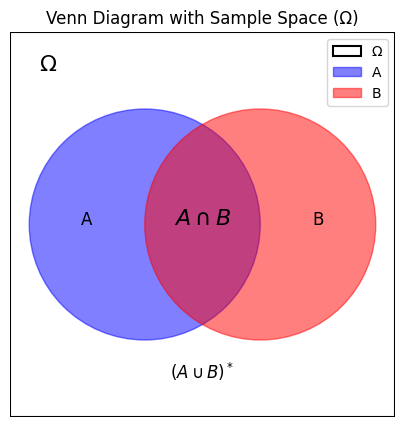

In [81]:
#Create a figure and axes to display the sample space and events
fig, ax = plt.subplots(figsize=(5,5))

#define the coordinates and size for the sample space rectangle 
rect = patches.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor='black', linewidth=1.5, label='Ω')
ax.add_patch(rect)

#Defien the coordinates for the center of the circles for events A and B
circle1_center = (0.35, 0.5)
circle2_center = (0.65, 0.5)
radius = 0.3

#draw the circles 
circle1_center = patches.Circle(circle1_center, radius, facecolor='blue', edgecolor='blue', alpha=0.5, label='A')
circle2_center = patches.Circle(circle2_center, radius, facecolor='red', edgecolor='red', alpha=0.5, label='B')

ax.add_patch(circle1_center)
ax.add_patch(circle2_center)

#set plot limits and labels
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal', adjustable='box')
ax.set_title('Venn Diagram with Sample Space (Ω)')

#add text labels for events A and B
ax.text(0.2,0.5, "A", fontsize = 12, ha= 'center')
ax.text(0.8,0.5, "B", fontsize = 12, ha= 'center')

ax.text(0.5, 0.5, '$A \\cap B$', fontsize=16, ha='center')
ax.text(0.1, 0.9, '$\Omega$', fontsize=16, ha='center')

# Add a label for the complement outside the circles
ax.text(0.5, 0.1, '$(A \\cup B)^*$', fontsize=12, ha='center')

#remove the axes
ax.axis('off')
# Add a legend
ax.legend(loc='upper right')
plt.savefig('venn_diagram.png')
plt.show()

#### Probability Basics 

###### **Classical Probability** (equally likely outcomes):
###### $$ P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of outcomes}} $$


###### **Addition Rule (general):**
###### $$ P(A \cup B) = P(A) + P(B) - P(A \cap B) $$

###### **Conditional Probability (Begingad Sannolikhet):**
###### $$ P(B \mid A) = \frac{P(A \cap B)}{P(A)} \quad (P(A)>0) $$

###### **Law of Total Probability**- total probability of an event B by considering all mutually exclusive scenarios $(A_i)$:
###### $$ P(B) = \sum_i P(A_i)\,P(B \mid A_i) $$

###### **Bayes' Theorem:**
###### $$ P(A_j \mid B) = \frac{P(A_j)\,P(B \mid A_j)}{\sum_i P(A_i)\,P(B \mid A_i)} $$


##### Combinatorics (Kombinatorik)

###### **Permutations**  — ways to *arrange*  m items chosen from  n items **(order matters)**:  
###### $$ P(n, m) = \frac{n!}{(n - m)!} $$

###### **Combinations**  — ways to *choose*  m  items from  n  **(order does not matter)**:  
###### $$ \binom{n}{m} = \frac{n!}{m!(n - m)!}  $$

###### The binomial probability of getting k successes in n independent trials with success probability p:
###### $$ p^k(1-p)^{n-k} $$


In [82]:
def calculate_combinatorics(n, m):
    """Calculate and display permutations and combinations.
    
    Args:
        n: Total number of items
        m: Number of items to choose/arrange
    """
    try:
        # Validate inputs
        if n < m or n < 0 or m < 0:
            raise ValueError("n must be ≥ m and both must be non-negative")
            
        #Calculate permutations and combinations
        permutations = math.perm(n, m)
        combinations = math.comb(n, m)
        
        #Print results
        print(f"Permutationer (P({n}, {m})) = {permutations:,}")
        print(f"Kombinationer (C({n}, {m})) = {combinations:,}")
        
    except (ValueError, TypeError) as e:
        print(f"Error: {e}")

# Example 
calculate_combinatorics(5, 3)  # valid case
calculate_combinatorics(3, 5)  # invalid case because n < m

Permutationer (P(5, 3)) = 60
Kombinationer (C(5, 3)) = 10
Error: n must be ≥ m and both must be non-negative


##### Simulation of rolling a dice for pdf and cdf of a discrete random variable


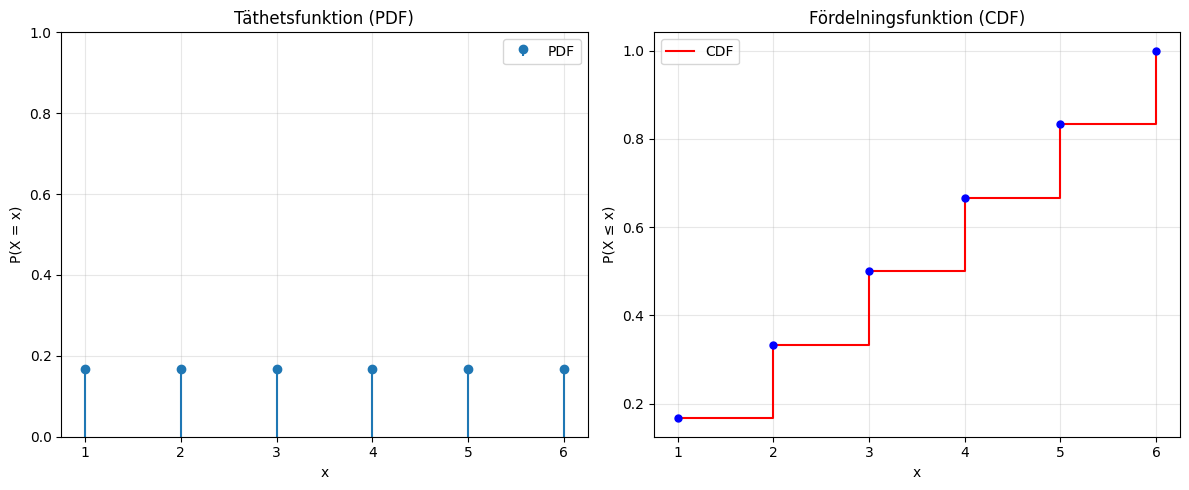


Probability values:
x=1: PDF=0.167, CDF=0.167
x=2: PDF=0.167, CDF=0.333
x=3: PDF=0.167, CDF=0.500
x=4: PDF=0.167, CDF=0.667
x=5: PDF=0.167, CDF=0.833
x=6: PDF=0.167, CDF=1.000


In [83]:
# Create sample space for a die (1-6)
x = np.arange(1, 7)

# draw dependently from the set (1,2,3,4,5,6) with equal probability (probability for each outcome is 1/6)
pdf = np.ones_like(x) / 6.0

# Calculate CDF (cumulative sum of probabilities)
cdf = np.cumsum(pdf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot PDF
ax1.stem(x, pdf, basefmt=' ', label='PDF')
ax1.set_title('Täthetsfunktion (PDF)')
ax1.set_xlabel('x')
ax1.set_ylabel('P(X = x)')
ax1.set_ylim(0, 1)  # Set y-axis limit from 0 to 1
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot CDF
ax2.step(x, cdf, 'r-', where='post', label='CDF')
ax2.plot(x, cdf, 'b.', markersize=10)
ax2.set_title('Fördelningsfunktion (CDF)')
ax2.set_xlabel('x')
ax2.set_ylabel('P(X ≤ x)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig("probability_distribution.png")
plt.show()


# Print probability values
print("\nProbability values:")
for i, (p, c) in enumerate(zip(pdf, cdf), 1):
    print(f"x={i}: PDF={p:.3f}, CDF={c:.3f}")

##### Stochastic Variables(Random Variables)
###### 1. Discrete stochastic variables: A random variable with countable set of possible outcomes. 

###### - Probability Mass Function(PMF) - The probability of the variable X taking on a specific value x: $$ p_X(x) = P(X=x) $$
###### - The sum of all probabilities must equal 1: $$ \sum_x p_X(x) = 1 $$

###### 2. Continuous stochastic variables: A random variable with an uncounatble set of possible outcomes. PDF: $$ f_X(x) $$
###### -   The total area under the PDF curve is 1. $$ \int_{-\infty}^{\infty}f_X(x)  =1 $$

###### 3. Cumulative Distribution Function (CDF): The probability that a random variable X takes a value less than or equal to a given value x. $$ F_X(x) = P(X\leq x) $$ 
###### -    For discrete stochastic variables: $$ F_X(x) = \sum_{k\leq x} p_X(k) $$
###### -    For continuous variables: $$ F_X(x) = \int_{-\infty}^{\infty} f_X(t)dt $$
###### -    Probability of an interval: $$ P(a\leq X \leq b) = F_X(b) - F_X(b) $$


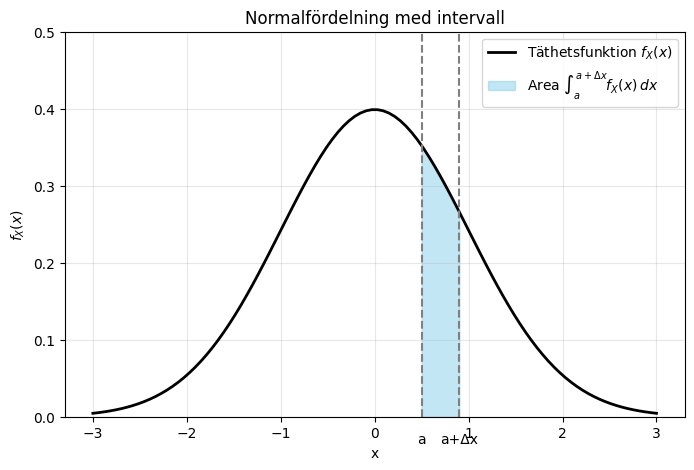

In [84]:
def plot_normal_distribution():
    # Create data points
    x = np.linspace(-3, 3, 100)
    pdf = norm.pdf(x, 0, 1)
    
    # Define interval
    a = 0.5
    dx = 0.4
    
    
    plt.figure(figsize=(8, 5))
    
    # Plot PDF and interval
    plt.plot(x, pdf, 'k', lw=2, label="Täthetsfunktion $f_X(x)$")
    plt.fill_between([a, a+dx], [0, 0], 
                     [norm.pdf(a, 0, 1), norm.pdf(a+dx, 0, 1)], 
                     color='skyblue', alpha=0.5,
                     label=r"Area $\int_a^{a+\Delta x} f_X(x)\,dx$")
    
    # Add vertical lines and labels for interval points
    plt.axvline(a, color="gray", linestyle="--")
    plt.axvline(a+dx, color="gray", linestyle="--")
    
    # Add text annotations for interval points
    plt.annotate('a', xy=(a, 0), xytext=(a, -0.02),
                ha='center', va='top')
    plt.annotate('a+Δx', xy=(a+dx, 0), xytext=(a+dx, -0.02),
                ha='center', va='top')
    
    # Add labels
    plt.title('Normalfördelning med intervall')
    plt.xlabel('x')
    plt.ylabel('$f_X(x)$')
    plt.ylim(0, 0.5)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right')
    
    plt.show()

plot_normal_distribution()

**Problem 1:** Card Probability
###### You randomly draw 5 cards from a standard deck of 52 cards. What is the probability that two of the drawn cards are kings, two are queens, and one is neither a king nor a queen? $ \binom{n}{k} = \frac {n!}{k!(n-k)} $

In [85]:
#Total possible outcomes of 5 cards from a standard deck of 52 cards
total_outcomes = math.comb(52, 5)

# Favorable outcomes for getting 2 Kings
kings = math.comb(4, 2)
queens = math.comb(4, 2)
others = math.comb(44, 1)
favorable_outcomes = kings * queens * others

# Probability calculation
probability = favorable_outcomes / total_outcomes
print(f"Probability of drawing 2 Kings, 2 Queens, and 1 other card: {probability:.3g}")

Probability of drawing 2 Kings, 2 Queens, and 1 other card: 0.000609


**Problem 2**: 
###### The stochastic variable X has the probability density function (PDF): $$ f(x) = \begin{cases} c|x|, & \text{if } -2 < x < 4 \\ 0, & \text{otherwise} \end{cases} $$
###### a) Determine c
###### b) Calculate P($ X\leq 2$ = F(2), where F is the cumulative distribution function(CDF) for X

c = 1/10 
 
P(X <= 2) = 2/5


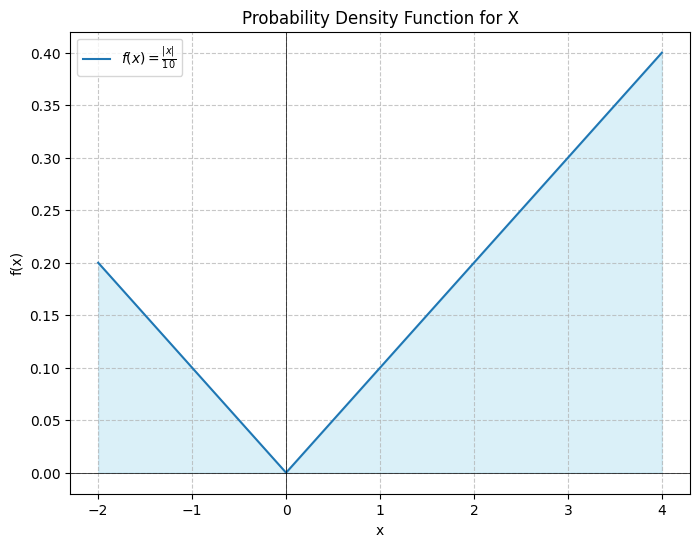

<Figure size 640x480 with 0 Axes>

In [86]:
# -----------------------------------------------------------
# a) Determine the constant c
# -----------------------------------------------------------
# Concept: The total area under a probability density function (PDF) must equal 1.
# set the integral of f(x) from -2 to 4 equal to 1 and solve for c

x, c = sp.symbols('x c')

f_x = c * Abs(x)

total_area = integrate(f_x, (x, -2, 4))

equation = sp.Eq(total_area, 1)
solution_c = sp.solve(equation, c)
c_value = solution_c[0]
c_value = float(c_value)
print(f"c = {solution_c[0]} \n ")

# -----------------------------------------------------------
# b) Calculate P(X <= 2) = F(2)
# -----------------------------------------------------------
# Concept: The probability P(X <= 2) is the area under the PDF from x = -2 to x = 2.
# integrate the function with solved c-value over this interval

f_x_solved = c_value * Abs(x)

probability = integrate(f_x_solved, (x, -2, 2))
probability = float(probability)

print(f"P(X <= 2) = {Fraction('0.4')}")

# ------------------------------
# c) Draw the graph of the PDF
# --------------------------------
# visualize the function f(x) to better understand the distribution.

x_vals = np.linspace(-2, 4, 400)
y_vals = c_value * np.abs(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=f'$ f(x) = \\frac{{|x|}}{{10}} $')
plt.title('Probability Density Function for X')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.fill_between(x_vals, y_vals, color='skyblue', alpha=0.3)
plt.legend()
plt.show()
plt.savefig("pdf_graph.png")

**Problem 3:**
###### A random variable X has the following probability density function: $$ f(x) = \begin{cases} -x, & \text{for } -1 < x < 0 \\ cx^2, & \text{for } 0 < x < 1 \\ 0, & \text{otherwise} \end{cases} $$

###### Determine the constant c and the probability that X is greater than 1/2, i.e., $ P(X > 1/2)$ 

 c = 3/2


P(X > 1/2) = 7/16


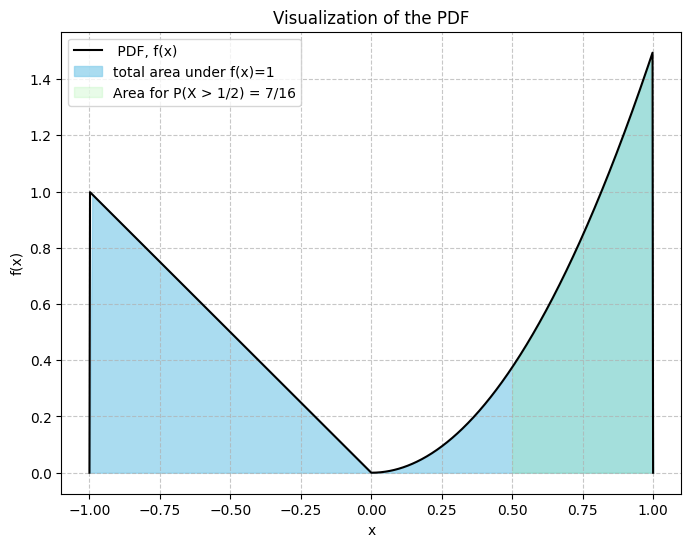

<Figure size 640x480 with 0 Axes>

In [90]:
# Determin the constant c:
#create symbolic variables x and c for the operations
x, c = sp.symbols('x c')

#integrate the first part of the function from -1 to 0
integral1 = sp.integrate(-x, (x, -1, 0))

#integrate the second part of the function from 0 to 1
integral2 = sp.integrate(c * x**2, (x, 0, 1))

#create an equation setting the sum of the integrals
#integral1 + integral2 = 1(total probability must equal 1)
equation = sp.Eq(integral1 + integral2, 1)

#solve for c
solution_c = sp.solve(equation,c)

#get the first and only solution for c
c_value = solution_c[0]

#print the value of c
print(f' c = {c_value}')
print(f'\n')

#calculate P(X > 1/2):
#define the function for x > 0 using the solved c value
f_x_part2 = c_value * x**2

#calculate the probability P(X > 1/2) by integrating f(x) from 1/2 to 1
probability = sp.integrate(f_x_part2, (x, sp.Rational(1,2), 1))

#print the probability value
print(f'P(X > 1/2) = {probability}')

#-------------------------------------
# Plot the graph to visualize the PDF
#-------------------------------------

#define first the piecewise PDF function
def f(x, c=float(c_value)): #this is f(x)
    if -1 < x < 0: #first piece: -x for -1 < x < 0
        return -x
    elif 0 < x < 1: #second piece: cx^2 for 0 < x < 1
        return c * x**2
    else: # zero otherwise
        return 0
    
#create data points for x and f(x)
x_vals = np.linspace(-1,1,1000) # 00 points from -1 to 1
#calculate y values. initalize y values with zeros
y_vals = np.array([f(val) for val in x_vals])

#plot the PDF graph
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_vals, y_vals, label=' PDF, f(x)', color = 'black')

#shade the total area under the graph (from -1 to 1)
x_total_shade = np.linspace(-1, 1, 200)
y_total_shade = np.array([f(val) for val in x_total_shade])
ax.fill_between(x_total_shade, y_total_shade, color='skyblue', alpha=0.7, label='total area under f(x)=1')

#shade the area under the graph from 1/2 to 1 (P(X > 1/2))
x_prob_shade = np.linspace(0.5, 1, 100)
y_prob_shade = np.array([f(val) for val in x_prob_shade])
ax.fill_between(x_prob_shade, y_prob_shade, color='lightgreen', alpha=0.2, label=f'Area for P(X > 1/2) = {probability}')

# add title and labels to the plot
ax.set_title('Visualization of the PDF')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
plt.savefig("pdf_visualization.png")